# Monte Carlo Methods for Model-Free Problems

In [ ]:
import numpy as np
import sys
from blackjack import BlackjackEnv

In [ ]:
from collections import defaultdict

In [ ]:
import plotting

## 1) Policy Evaluation using MC method

### Blackjack modified game : (Sutton & Barto)

Example 5.1: Blackjack The object of the popular casino card game of
blackjack is to obtain cards the sum of whose numerical values is as great as
possible without exceeding 21. 
1)All face cards count as 10, and an ace can count
either as 1 or as 11. 
<br>
2)We consider the version in which each player competes
independently against the dealer. The game begins with two cards dealt to
both dealer and player. One of the dealer’s cards is face up and the other is
face down. 
<br>
&emsp;2a) If the player has 21 immediately (an ace and a 10-card), it is called
a natural. 
<br>
&emsp;2b)He then wins unless the dealer also has a natural, in which case the
game is a draw. 
<br>
&emsp;2c)If the player does not have a natural, then he can request
additional cards, one by one (hits), until he either stops (sticks) or exceeds 21
(goes bust). If he goes bust, he loses; if he sticks, then it becomes the dealer’s
turn. The dealer hits or sticks according to a fixed strategy without choice:
he sticks on any sum of 17 or greater, and hits otherwise. If the dealer goes
bust, then the player wins; 
<br>
&emsp;2d)otherwise, the outcome—win, lose, or draw—is
determined by whose final sum is closer to 21

#### Policy to be evaluated : 
Consider the policy that sticks if the player’s sum is 20 or 21, and other-
wise hits. To find the state-value function for this policy by a Monte Carlo
approach, one simulates many blackjack games using the policy and averages
the returns following each state. Note that in this task the same state never
recurs within one episode, so there is no difference between first-visit and
every-visit MC methods.

#### Playing with environment

In [ ]:
env = BlackjackEnv()

In [ ]:
observation = env.reset()

In [ ]:
print(observation) #(player_score,dealer_score,usable_ace)

#### actions - 'hit' denoted by 1,'stick' denoted by 0

##### No of states depends on  his current sum (12 to 21) => 10 states, the dealer’s one showing card (ace–10) => 10 states, and whether or not he holds a usable ace =>2 states. This makes for a total of 10x10x2 = 200 states.

In [ ]:
sample_policy(observation)

In [ ]:
#e.g - Simulate by taking action '1'
env.step(1)     #1 element -> observation after action tuple, 2nd element-> reward, 3rd -> done?, 4th element -> ignore?

### Policy to be evaluated

In [ ]:
def sample_policy(observation):
    player_score,_,_ = observation
    if player_score >=20:
        return 0
    else:
        return 1

### Monte-Carlo Evaluation (First Visit method)*  
*doesn't matter in our problem as state is accessed just once per episode

In [81]:
def mc_eval(env,n_episodes,discount_factor=1.0):
    return_state_dict = defaultdict(float)   #initialises to 0 to any unknown element
    count_state_dict = defaultdict(float)
    state_value_dict = defaultdict(float)
    for i in range(n_episodes):
        observation = env.reset()
        print(observation)
        done = False
        print(str(i)+" episode")
        episode_event = []
        while done==False:
            action = sample_policy(observation)
            new_observation,reward,done,_ = env.step(action)
            
            #print(observation,reward,done)
            #state_string = str(observation[0])+','+str(observation[1])+','+str(observation[2])
            episode_event.append((observation,action,reward))
            observation = new_observation    
        #------END OF EPISODE-------SEQUENCE OF STATE,ACTION,REWARD RECORDED IN episode_event list--------
        print("Event happened in this episode - ",episode_event)
        states = set(tuple(x[0]) for x in episode_event)
        for state in states:
            first_occurence = next(i for i,x in enumerate(episode_event) if x[0]==state)
            relavant_episodes = episode_event[first_occurence:]
            G = 0
            #accumuate return following first occurence => R_t + d*(R_t1) + d^2*(R_t2) + ......... d^T*(R_tT)
            for i,x in enumerate(relavant_episodes):
                reward_ = x[2]
                G = G+ reward_*(discount_factor**i) 
            return_state_dict[state]+=G
            #This will average RETURNS per episode as well as CONSEQUENTLY across episodes!
            count_state_dict[state]+=1.0 
            state_value_dict[state] = return_state_dict[state]/count_state_dict[state]
        
    return state_value_dict
            

#### 10k, 500k steps, using plotting function used by Denny Britz(some really lit plotting code!)

In [ ]:
env = BlackjackEnv()
V_10k = mc_eval(env, 10000)

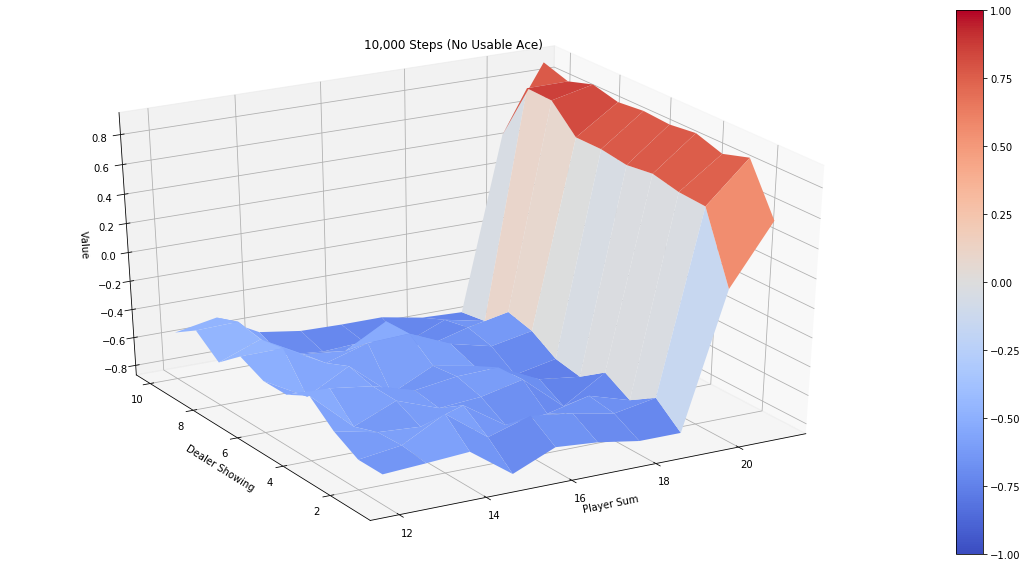

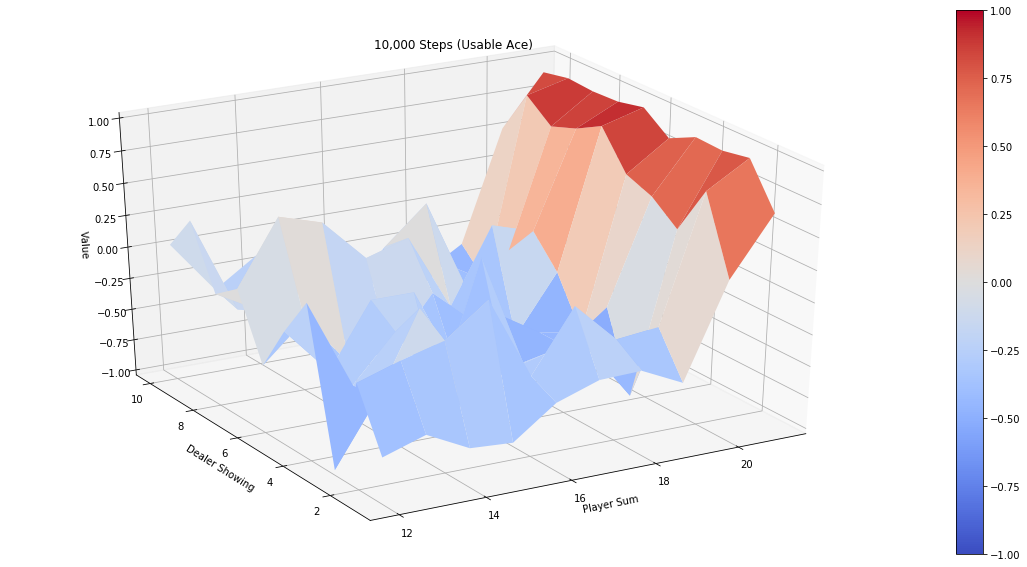

In [79]:
plotting.plot_value_function(V_10k, title="10,000 Steps")

In [ ]:
V_500k = mc_eval(env, 500000)

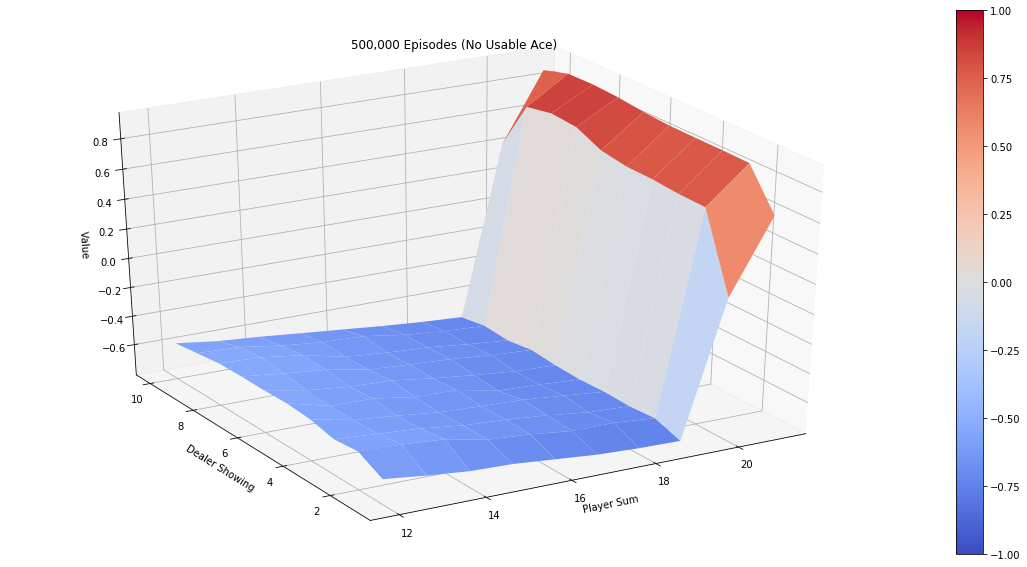

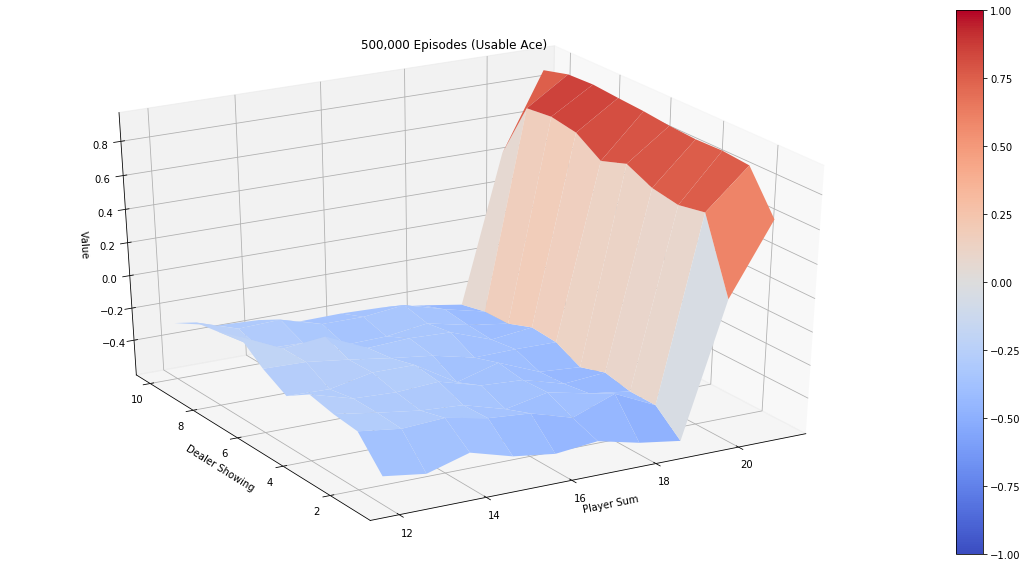

In [78]:
plotting.plot_value_function(V_500K, title="500,000 Episodes")